In [29]:
import numpy as np

In [30]:
from sklearn.datasets import make_regression #dataset
import matplotlib.pyplot as plt #graphes

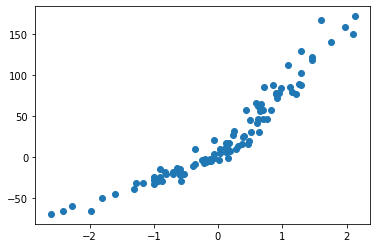

In [31]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x, y)

In [32]:
print (x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [33]:
#matrice x
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2,X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 2.57238821e-01  5.07187166e-01  1.00000000e+00]
 [ 5.89568126e-01  7.67833398e-01  1.00000000e+00]
 [ 1.61892496e+00 -1.27236982e+00  1.00000000e+00]
 [ 3.92959674e+00  1.98232105e+00  1.00000000e+00]
 [ 1.66948679e+00  1.29208622e+00  1.00000000e+00]
 [ 4.38561079e+00  2.09418499e+00  1.00000000e+00]
 [ 4.97733636e-01 -7.05502400e-01  1.00000000e+00]
 [ 4.32186004e-03 -6.57408552e-02  1.00000000e+00]
 [ 1.88629303e-02 -1.37342383e-01  1.00000000e+00]
 [ 9.01642133e-01  9.49548384e-01  1.00000000e+00]]


In [34]:
theta= np.random.randn(3,1)
theta

array([[-1.38982937],
       [-0.70689646],
       [-0.5864304 ]])

In [35]:
def model (X, theta):
    return X.dot(theta)

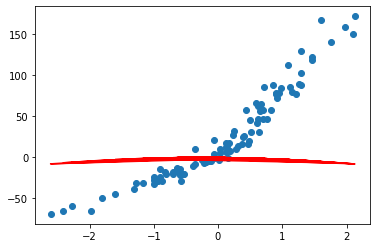

In [36]:
plt.scatter(x,y)
plt.plot(x, model(X,theta), c="red")

In [19]:
def cost_function(X, y, theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y) **2)

In [20]:
cost_function(X, y, theta)

2334.974240922777

In [21]:
def grad(X, y , theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [22]:
def gradient_descent(X , y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y , theta)
    return theta, cost_history

In [23]:
theta_final , cost_history = gradient_descent(X, y , theta, learning_rate=0.01, n_iterations=1000)

In [24]:
theta_final

array([[11.97177312],
       [54.24574737],
       [10.80514917]])

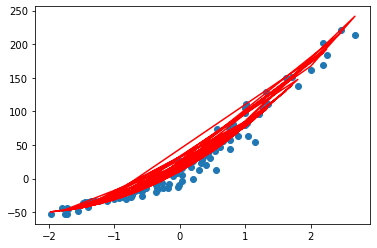

In [25]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c="red")

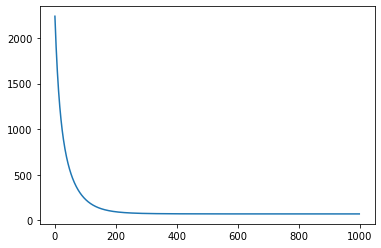

In [26]:
plt.plot(range(1000), cost_history)

In [27]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y -y.mean())**2).sum()
    return 1 - u/v

In [28]:
coef_determination(y, predictions)

0.966754359973365